In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

from sklearn.linear_model import LogisticRegression

df=pd.read_csv('/content/cleaned_burnout_dataset.csv')

print(df.dtypes)



EmployeeID                  int64
Age                         int64
Gender                     object
Country                    object
JobRole                    object
Department                 object
YearsAtCompany              int64
WorkHoursPerWeek            int64
RemoteWork                 object
BurnoutLevel              float64
JobSatisfaction           float64
StressLevel               float64
ProductivityScore         float64
SleepHours                float64
PhysicalActivityHrs       float64
CommuteTime                 int64
HasMentalHealthSupport     object
ManagerSupportScore       float64
HasTherapyAccess           object
MentalHealthDaysOff         int64
SalaryRange                object
WorkLifeBalanceScore      float64
TeamSize                    int64
CareerGrowthScore         float64
BurnoutRisk                 int64
dtype: object


In [2]:
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.select_dtypes(include="number").columns
print(cat_cols)
print(num_cols)

Index(['Gender', 'Country', 'JobRole', 'Department', 'RemoteWork',
       'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange'],
      dtype='object')
Index(['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek',
       'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore',
       'SleepHours', 'PhysicalActivityHrs', 'CommuteTime',
       'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore',
       'TeamSize', 'CareerGrowthScore', 'BurnoutRisk'],
      dtype='object')


In [3]:
if df['BurnoutRisk'].dtype == 'object':
    df['BurnoutRisk'] = df['BurnoutRisk'].map({'Yes': 1, 'No': 0})

In [4]:
X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [15]:
#Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_predictions = model.predict(X_test)
y_proba_log = model.predict_proba(X_test)[:, 1]
print("Logistic regression")
print("Accuracy:", accuracy_score(y_test, y_predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predictions))


Logistic regression
Accuracy: 0.9866666666666667
Confusion matrix:
 [[594   8]
 [  4 294]]


In [10]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

y_predictions_lda = model_lda.predict(X_test)
y_proba_lda = model_lda.predict_proba(X_test)[:, 1]
print("Linear Discriminat analysis:")
print("Accuracy:", accuracy_score(y_test, y_predictions_lda))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predictions_lda))

Linear Discriminat analysis:
Accuracy: 0.9566666666666667
Confusion matrix:
 [[563  39]
 [  0 298]]


In [11]:
y_prob_log = model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

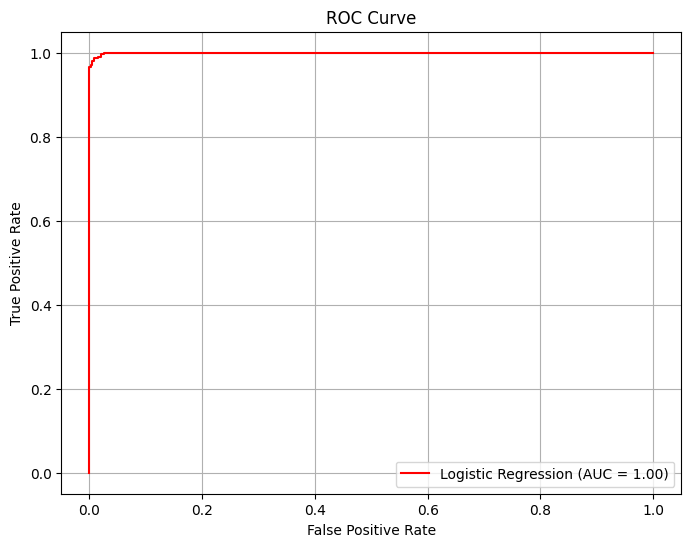

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
y_prob_lda = model_lda.predict_proba(X_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

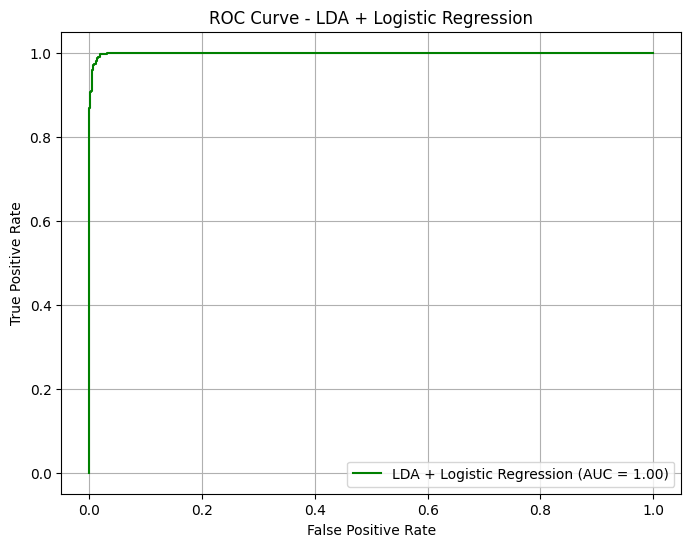

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, label=f'LDA + Logistic Regression (AUC = {roc_auc_lda:.2f})', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA + Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()